# Random Clifford (simulator)

In [1]:
import qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
import qiskit.quantum_info as qi
from qiskit.visualization import plot_histogram

In [9]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-utokyo', group='internal', project='hirashi-jst')

In [3]:
import sys
sys.path.append("../")

In [4]:
import random
import numpy as np
import importlib
import pickle
import time
from pprint import pprint
import matplotlib.pyplot as plt

In [5]:
from test_unitaries import *

In [6]:
seed = 42 # random seed
num_data = 200 # original: 20000
Nq = 4 # number of qubit
Ns = 1000

In [7]:
results = []

In [8]:
t1 = time.time()
for i in range(1, num_data + 1):
    qc = QuantumCircuit(Nq, Nq)
    qc.append(qi.random_clifford(Nq, seed = i - 1).to_instruction(), range(Nq))
    qc.measure(range(Nq), range(Nq)[::-1])
    results.append(execute(qc, shots = Ns, backend = Aer.get_backend("qasm_simulator"), seed_transpiler=seed, seed_simulator=seed).result())
    if i % 100 == 0:
        t2 = time.time()
        print("added", i, "th data (", t2 - t1, "s)")
        t1 = t2
        with open("training_data_rc_fix_basis_simulator.pkl", "wb") as f:
            pickle.dump(results, f)

added 100 th data ( 8.796446084976196 s)
added 200 th data ( 8.48478102684021 s)


- the result data is stored at .pkl file
- you can convert the data from Result type to counts (dict of state (str) to counts (int)) by the following function

In [10]:
def results_to_counts(results):
    counts = []
    for result in results:
        counts.append(result.get_counts())
    return counts

In [15]:
counts = results_to_counts(results)

In [17]:
def to_full_hist(hist):
    n = len(list(hist.keys())[0])
    new_hist = {}
    for i in range(2 ** n):
        new_hist[format(i, "0"+str(n)+"b")] = hist.get(format(i, "0"+str(n)+"b"), 0)
    return new_hist

In [18]:
counts = [to_full_hist(hist) for hist in counts]

In [19]:
counts

[{'0000': 114,
  '0001': 132,
  '0010': 0,
  '0011': 0,
  '0100': 0,
  '0101': 0,
  '0110': 114,
  '0111': 119,
  '1000': 138,
  '1001': 125,
  '1010': 0,
  '1011': 0,
  '1100': 0,
  '1101': 0,
  '1110': 148,
  '1111': 110},
 {'0000': 0,
  '0001': 132,
  '0010': 114,
  '0011': 0,
  '0100': 138,
  '0101': 0,
  '0110': 0,
  '0111': 110,
  '1000': 114,
  '1001': 0,
  '1010': 0,
  '1011': 119,
  '1100': 0,
  '1101': 125,
  '1110': 148,
  '1111': 0},
 {'0000': 46,
  '0001': 63,
  '0010': 50,
  '0011': 61,
  '0100': 72,
  '0101': 68,
  '0110': 70,
  '0111': 60,
  '1000': 68,
  '1001': 69,
  '1010': 64,
  '1011': 58,
  '1100': 66,
  '1101': 57,
  '1110': 78,
  '1111': 50},
 {'0000': 46,
  '0001': 63,
  '0010': 50,
  '0011': 61,
  '0100': 72,
  '0101': 68,
  '0110': 70,
  '0111': 60,
  '1000': 68,
  '1001': 69,
  '1010': 64,
  '1011': 58,
  '1100': 66,
  '1101': 57,
  '1110': 78,
  '1111': 50},
 {'0000': 0,
  '0001': 132,
  '0010': 114,
  '0011': 0,
  '0100': 138,
  '0101': 0,
  '0110': 0,
  '

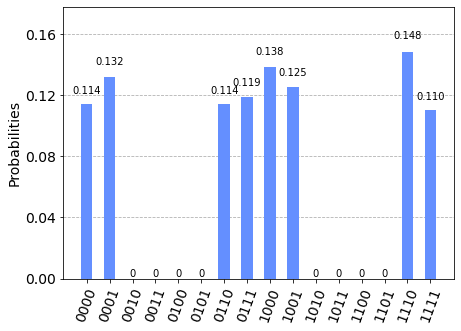

In [20]:
plot_histogram(counts[0])

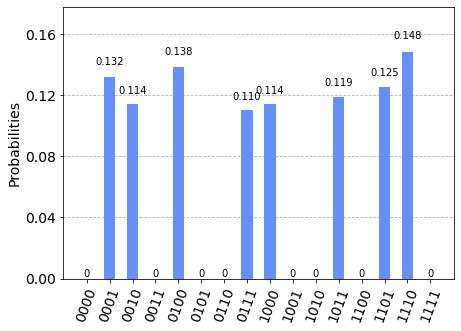

In [21]:
plot_histogram(counts[1])

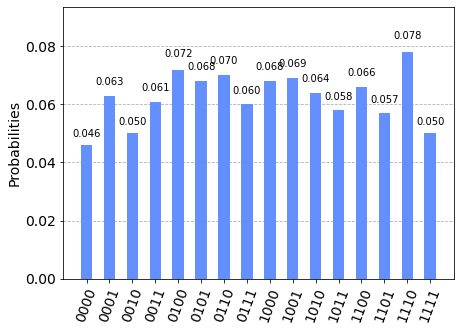

In [22]:
plot_histogram(counts[2])

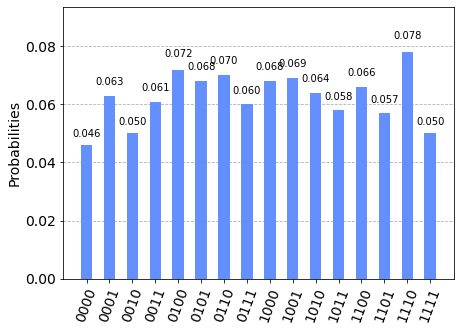

In [23]:
plot_histogram(counts[3])

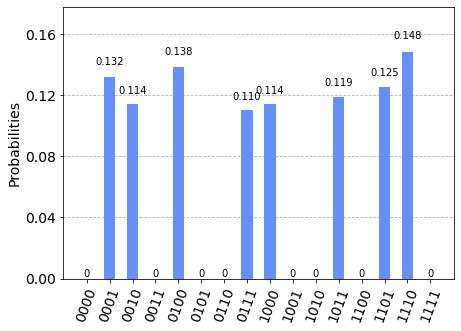

In [24]:
plot_histogram(counts[4])

In [26]:
ibmq_montreal = provider.get_backend("ibmq_montreal")

In [37]:
from qiskit.compiler import transpile
ops = []
depth = []
for i in range(1,15):
    qc = QuantumCircuit(i, i)
    qc.append(qi.random_clifford(i, seed = i - 1).to_instruction(), range(i))
    tqc = transpile(qc, backend = ibmq_montreal, approximation_degree=0)
    ops.append(tqc.count_ops())
    depth.append(tqc.depth())
    print(i, "finished")

1 finished
2 finished
3 finished
4 finished
5 finished
6 finished
7 finished
8 finished
9 finished
10 finished
11 finished
12 finished
13 finished
14 finished


In [39]:
ops_rz = [ops[i].get("rz", 0) for i in range(len(ops))]
ops_sx = [ops[i].get("sx", 0) for i in range(len(ops))]
ops_cx = [ops[i].get("cx", 0) for i in range(len(ops))]

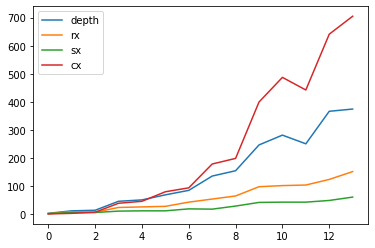

In [40]:
plt.plot(depth)
plt.plot(ops_rz)
plt.plot(ops_sx)
plt.plot(ops_cx)
plt.legend(["depth", "rx", "sx", "cx"])
plt.show()

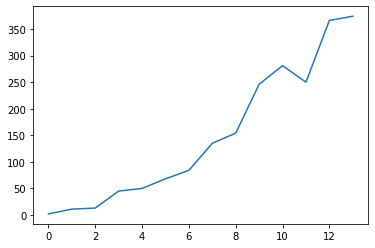

In [38]:
plt.plot(depth)